# WeatherPy Analysis
----

#### Observations
* Temperatures tended to peak around 20 degrees north of the equator and dropped the further north or south of the equator a city is
* There doesn’t appear to be a correlation with location from the equator and humidity
* There also wasn’t much correlation between location from the equator and wind speed, however there was a slight cluster between 40 and 60 degrees north of the equator averaging winds around 5 mph

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from the_key import other_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:

    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    #if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# len(cities)
# print(cities[0])
# print(cities[1])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# build query url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query_url = base_url + "appid=" + other_key + "&units=" + units + "&q=" + city
# print(query_url)

params = {
"appid": other_key,
"units": "imperial",
"q": city
}

response = requests.get(base_url, params=params)
# print(response.url)

In [8]:
# print the corresponding number for each city  
city_number = 1

# empty lists to append the api data 
city_name = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
    
# print statement as each city is processed
print(f"Beginning Data Retrieval")
print(f"==============================")

# loop through the cities in the city list 
for city in cities:  
    
    params = {
    "appid": other_key,
    "units": "imperial",
    "q": city
    } 
    
    # try statement for each potential value
    try: 
        response_raw = requests.get(base_url, params=params)
        response = response_raw.json()
        city_name.append(response["name"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        print_name = response["name"]

        print(f"Processing Record {city_number} | {print_name}")
        print(response_raw.url)     
        
        # increase city number by one each loop
        city_number= city_number + 1
        
        # to avoid 60 rpm api limit i'm waiting just over 1 second per loop
        # https://www.pythoncentral.io/pythons-time-sleep-pause-wait-sleep-stop-your-code/)
        time.sleep(1.01)
        
    # skip if no city is found
    except:
        print("City not found. Skipping...")
    continue
    
print(f"==============================")
print(f"Data Retrieval Complete")
print(f"==============================")


Beginning Data Retrieval
Processing Record 1 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=punta+arenas
Processing Record 2 | Lagoa
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=lagoa
Processing Record 3 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=tuatapere
Processing Record 4 | Jawhar
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=jawhar
Processing Record 5 | Inirida
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=inirida
Processing Record 6 | Saint-Michel-des-Saints
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=saint-michel-des-saints
Processing Record 7 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=8edc

Processing Record 57 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=henties+bay
Processing Record 58 | Mishan
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=mishan
Processing Record 59 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=guerrero+negro
City not found. Skipping...
Processing Record 60 | Padang
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=padang
Processing Record 61 | Kysyl-Syr
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=kysyl-syr
Processing Record 62 | Samana
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=samana
Processing Record 63 | Kingston
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdb

Processing Record 112 | Katsuura
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=katsuura
Processing Record 113 | Geraldton
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=geraldton
Processing Record 114 | Palmer
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=palmer
Processing Record 115 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=port+lincoln
City not found. Skipping...
City not found. Skipping...
Processing Record 116 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=taoudenni
Processing Record 117 | Hasaki
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=hasaki
Processing Record 118 | Hofn
http://api.openweathermap.org/data/2.5/we

Processing Record 168 | Livno
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=livno
City not found. Skipping...
Processing Record 169 | Aklavik
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=aklavik
Processing Record 170 | Galle
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=galle
Processing Record 171 | Ostersund
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=ostersund
City not found. Skipping...
Processing Record 172 | Novo Aripuana
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=novo+aripuana
Processing Record 173 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=thinadhoo
Processing Record 174 | Margate
http://api.openweathermap.org/data/2.5/wea

Processing Record 224 | Provideniya
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=provideniya
Processing Record 225 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=makakilo+city
Processing Record 226 | Uglyanets
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=uglyanets
Processing Record 227 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=airai
City not found. Skipping...
Processing Record 228 | Longjiang
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=longjiang
Processing Record 229 | Challapata
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=challapata
Processing Record 230 | Ramgarh
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 279 | Tayu
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=tayu
City not found. Skipping...
Processing Record 280 | Marshall
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=marshall
Processing Record 281 | Hervey Bay
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=hervey+bay
Processing Record 282 | Bristol
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=bristol
Processing Record 283 | Chifeng
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=chifeng
Processing Record 284 | Kerns
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=kerns
Processing Record 285 | Saskatoon
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348

Processing Record 334 | Gizo
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=gizo
Processing Record 335 | Alekseyevsk
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=alekseyevsk
Processing Record 336 | Potosi
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=potosi
Processing Record 337 | Springbok
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=springbok
Processing Record 338 | Ghatanji
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=ghatanji
Processing Record 339 | Adrar
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=adrar
Processing Record 340 | Aripuana
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=arip

Processing Record 391 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=bandarbeyla
Processing Record 392 | Ojinaga
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=ojinaga
Processing Record 393 | Ridgetown
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=ridgetown
Processing Record 394 | Maldonado
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=maldonado
Processing Record 395 | Guarapari
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=guarapari
Processing Record 396 | Karoi
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=karoi
Processing Record 397 | Hirara
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imp

Processing Record 446 | Naryan-Mar
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=naryan-mar
Processing Record 447 | Tacarigua
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=tacarigua
Processing Record 448 | Werda
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=werda
Processing Record 449 | Magdagachi
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=magdagachi
Processing Record 450 | Drayton Valley
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=drayton+valley
Processing Record 451 | Hammerfest
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=hammerfest
Processing Record 452 | General Teran
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d

Processing Record 501 | Asuncion
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=asuncion
Processing Record 502 | Champerico
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=champerico
Processing Record 503 | Jaru
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=jaru
Processing Record 504 | Bilma
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=bilma
Processing Record 505 | Morro Bay
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=morro+bay
Processing Record 506 | Lahaina
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=lahaina
City not found. Skipping...
Processing Record 507 | Itoman
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b616134

Processing Record 556 | Sal Rei
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=sal+rei
Processing Record 557 | Thanh Hoa
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=thanh+hoa
Processing Record 558 | Jieshi
http://api.openweathermap.org/data/2.5/weather?appid=8edcb05ecb13bdbda3d71b6161348644&units=imperial&q=jieshi
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_weather_df= pd.DataFrame ({
    "City": city_name,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Lat": lat,
    "Lng" : lng,
    "Max Temp" : temp,
    "Wind Speed" : wind_speed
})

city_weather_df.to_csv('city_weather_output.csv', index=False)
city_weather_df.head()

,City,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,40,87,-53.16,-70.91,33.80,17.22
1,Lagoa,0,73,37.14,-8.45,73.40,6.93
2,Tuatapere,100,61,-46.13,167.69,55.99,8.99
3,Jawhar,100,95,19.91,73.23,76.75,10.33
4,Inirida,92,91,3.87,-67.92,74.57,2.37


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

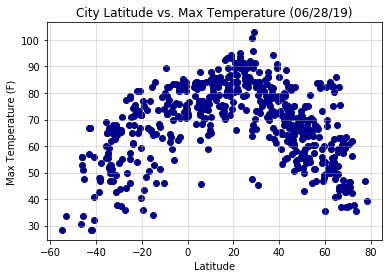

In [22]:
# define x, y, and area for each city type
x_lat = np.array(city_weather_df["Lat"])
y_temp = np.array(city_weather_df["Max Temp"])

# build scatter plots for each city type
plt.scatter(x_lat, y_temp, marker="o", facecolor="darkblue", edgecolors="darkblue", alpha=1)

# label graph
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (06/28/19)")
plt.grid(alpha = 0.5)

# show plot
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

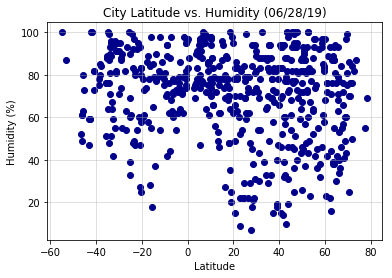

In [21]:
# define x, y, and area for each city type
x_lat = np.array(city_weather_df["Lat"])
y_hum = np.array(city_weather_df["Humidity"])

# build scatter plots for each city type
plt.scatter(x_lat, y_hum, marker="o", facecolor="darkblue", edgecolors="darkblue", alpha=1)

# label graph
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (06/28/19)")
plt.grid(alpha = 0.5)

# show plot
plt.savefig("lat_vs_humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

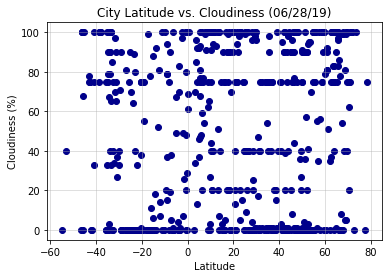

In [20]:
# define x, y, and area for each city type
x_lat = np.array(city_weather_df["Lat"])
y_cloud = np.array(city_weather_df["Cloudiness"])

# build scatter plots for each city type
plt.scatter(x_lat, y_cloud, marker="o", facecolor="darkblue", edgecolors="darkblue", alpha=1)

# label graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (06/28/19)")
plt.grid(alpha = 0.5)

# show plot
plt.savefig("lat_vs_clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

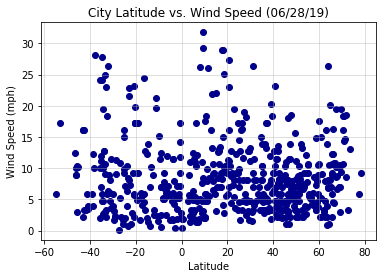

In [19]:
# define x, y, and area for each city type
x_lat = np.array(city_weather_df["Lat"])
y_wind = np.array(city_weather_df["Wind Speed"])

# build scatter plots for each city type
plt.scatter(x_lat, y_wind, marker="o", facecolor="darkblue", edgecolors="darkblue", alpha=1)

# label graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (06/28/19)")
plt.grid(alpha = 0.5)

# show plot
plt.savefig("lat_vs_wind.png")
plt.show()